**Package Configuration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter 
import os


In [6]:
coffee = pd.read_csv("../data/Coffee_sales.csv")
coffee.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


<Axes: xlabel='coffee_name'>

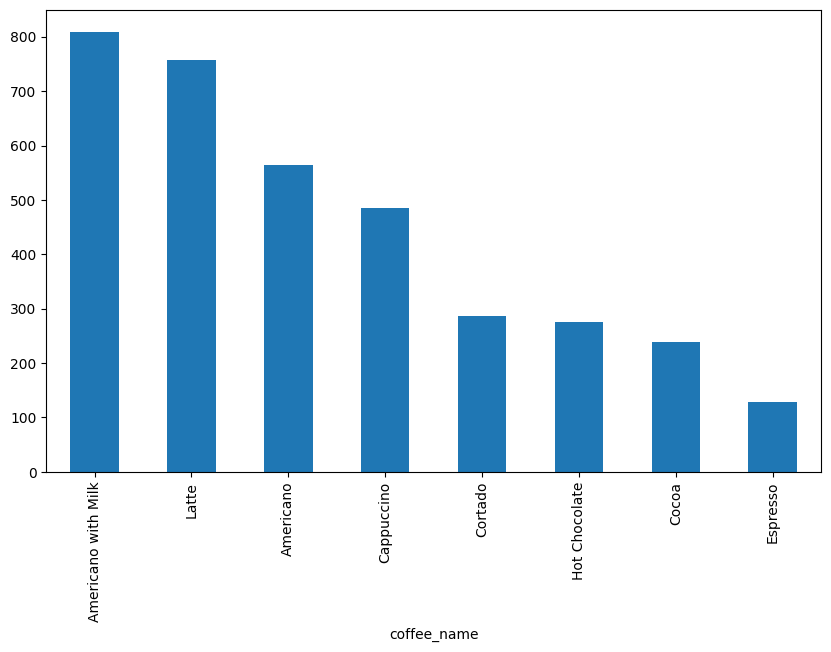

In [ ]:
coffee['coffee_name'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Coffee Name Distribution')

C:\Users\chris\AppData\Local\Temp\ipykernel_44776\2255490460.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


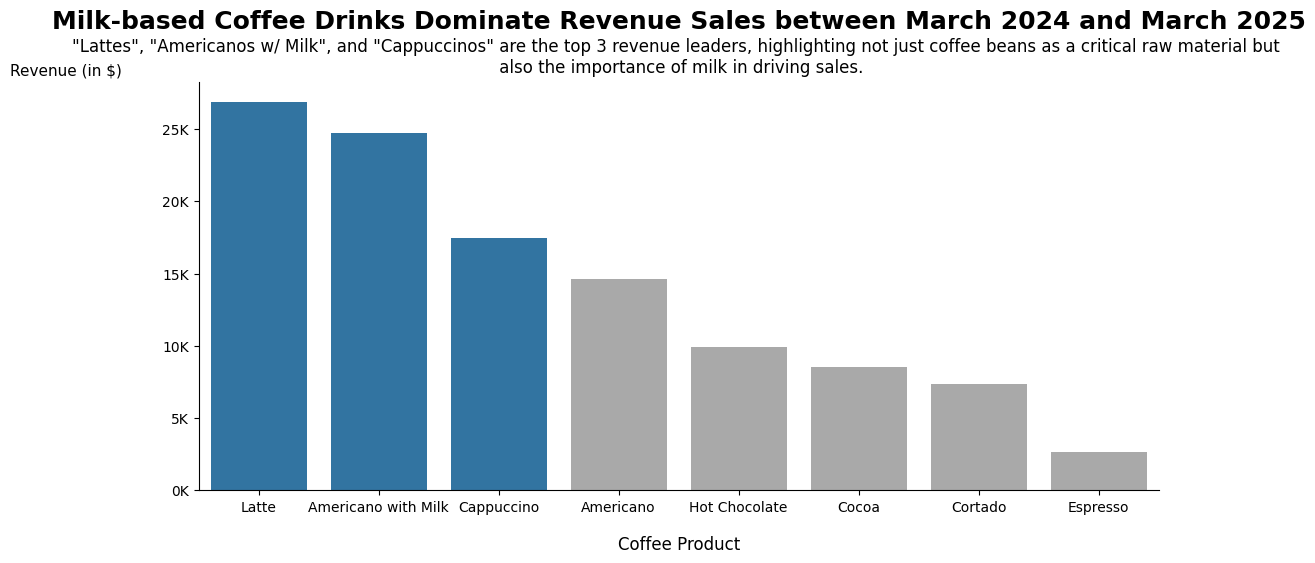

In [35]:
from matplotlib.ticker import FuncFormatter 

df = coffee.groupby('coffee_name')['money'].sum().reset_index().sort_values(by='money', ascending=False)


fig, ax = plt.subplots(figsize=(12, 6))

highlight_color = sns.color_palette()[0] 
other_color = 'darkgrey'

highlight_list = ['Latte', 'Americano with Milk', 'Cappuccino']
color_map = {name: highlight_color if name in highlight_list else other_color 
             for name in df['coffee_name']}

sns.barplot(
    data=df, 
    x='coffee_name', 
    y='money', 
    palette=color_map,
    ax=ax
)

ax.set_ylabel('Revenue (in $)', rotation=0, ha='right', fontsize=11)
ax.yaxis.set_label_coords(-0.08, 1.01)

ax.text(
    0.5, 
    1.12, 
    'Milk-based Coffee Drinks Dominate Revenue Sales between March 2024 and March 2025',
    transform=ax.transAxes,
    fontsize=18,
    fontweight='bold',
    ha='center', 
    va='bottom'
)
ax.text(
    0.5, 
    1.11,
    '"Lattes", "Americanos w/ Milk", and "Cappuccinos" are the top 3 revenue leaders, highlighting not just coffee beans as a critical raw material but \n also the importance of milk in driving sales.',
    transform=ax.transAxes,
    fontsize=12,
    ha='center', 
    va='top' 
)


ax.set_xlabel('Coffee Product', fontsize=12, labelpad=15)

sns.despine()

def k_formatter(y, pos):
    """Formats y-axis ticks to 'K' notation"""
    return f'{y/1000:,.0f}K'

ax.yaxis.set_major_formatter(FuncFormatter(k_formatter))

plt.subplots_adjust(top=0.83, bottom=0.15, left=0.1)

plt.show()

